In [1]:
# load in other libs
import sys
sys.path.append('demo_python_backend_files/')

# import JS animator
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from JSAnimation_slider_only import IPython_display

# import autograd
from autograd import grad as compute_grad   # The only autograd function you may ever need

# import sympy
from sympy import symbols, lambdify, sin, cos, tanh, exp, log, Max
import autograd.numpy as np

In [27]:
from sympy import symbols, lambdify, sin, cos, tanh, exp, log, Max
import autograd.numpy as np
from autograd import grad as compute_grad   # The only autograd function you may ever need
import math
# simple first order taylor series visualizer
class taylor_viz:
    def __init__(self,**args):
        self.f = args['f']
        self.grad = compute_grad(self.f)
        self.hess = compute_grad(self.grad)

    # compute first order approximation
    def animate_first_order_approx(self):
        # initialize figure
        fig = plt.figure(figsize = (7,7))
        artist = fig
        ax = fig.add_subplot(111)

        # generate function for plotting on each slide
        x_plot = np.linspace(-3,3,200)
        f_plot = f(x_plot)
        f_range = max(f_plot) - min(f_plot)
        fgap = f_range*0.5
        x_vals = np.linspace(-2.5,2.5,50)
        width = 1

        # animation sub-function
        def animate_it(k):
            ax.cla()
            x_val = x_vals[k]

            # plug in value into func and derivative
            f_val = f(x_val)
            f_grad_val = self.grad(x_val)
            
            # determine width to plot the approximation -- so its length == width defined above
            div = float(1 + f_grad_val**2)
            x1 = x_val - math.sqrt(width/div)
            x2 = x_val + math.sqrt(width/div)
            
            # compute first order approximation
            xrange = np.linspace(x1,x2, 100)
            h = f_val + f_grad_val*(xrange - x_val)

            # plot all
            ax.plot(x_plot,f_plot,color = 'k',zorder = 0)                           # plot function
            ax.plot(xrange,h,color = 'b',linewidth = 2,zorder = 1)      # plot approx
            ax.scatter(x_val,f_val,s = 50,c = 'r',zorder = 2)            # plot point of tangency
            
            # fix viewing limits
            ax.set_xlim([-3,3])
            ax.set_ylim([min(f_plot) - fgap,max(f_plot) + fgap])

            return artist,

        anim = animation.FuncAnimation(fig, animate_it,frames=len(x_vals), interval=len(x_vals), blit=True)

        # set frames per second in animation
        IPython_display.anim_to_html(anim,fps = len(x_vals))

        return(anim)
    
    # compute second order approximation
    def animate_second_order_approx(self):
        # initialize figure
        fig = plt.figure(figsize = (7,7))
        artist = fig
        ax = fig.add_subplot(111)

        # generate function for plotting on each slide
        x_plot = np.linspace(-3,3,200)
        f_plot = f(x_plot)
        f_range = max(f_plot) - min(f_plot)
        fgap = f_range*0.5
        x_vals = np.linspace(-2.5,2.5,50)
        width = 0

        # animation sub-function
        def animate_it(k):
            ax.cla()
            x_val = x_vals[k]

            # plug in value into func and derivative
            f_val = f(x_val)
            f_grad_val = self.grad(x_val)
            f_hess_val = self.hess(f_grad_val)
            
            # determine width of plotting area for second order approximator
            width = 0.5
            if f_hess_val < 0:
                width = - width
            
            # setup quadratic formula params
            a = 0.5*f_hess_val
            b = f_grad_val - 2*0.5*f_hess_val*x_val
            c = 0.5*f_hess_val*x_val**2 - f_grad_val*x_val - width
            
            # solve for zero points
            x1 = (-b + math.sqrt(b**2 - 4*a*c))/float(2*a + 0.00001)
            x2 = (-b - math.sqrt(b**2 - 4*a*c))/float(2*a + 0.00001)
    
            # compute second order approximation
            xrange = np.linspace(x1,x2, 100)
            h = f_val + f_grad_val*(xrange - x_val) + 0.5*f_hess_val*(xrange - x_val)**2 
            
            # plot all
            ax.plot(x_plot,f_plot,color = 'k',zorder = 0)                           # plot function
            ax.plot(xrange,h,color = 'b',linewidth = 2,zorder = 1)      # plot approx
            ax.scatter(x_val,f_val,s = 50,c = 'r',zorder = 2)            # plot point of tangency
            
            # fix viewing limits
            ax.set_xlim([-3,3])
            ax.set_ylim([min(f_plot) - fgap,max(f_plot) + fgap])

            return artist,

        anim = animation.FuncAnimation(fig, animate_it,frames=len(x_vals), interval=len(x_vals), blit=True)

        # set frames per second in animation
        IPython_display.anim_to_html(anim,fps = len(x_vals))

        return(anim)


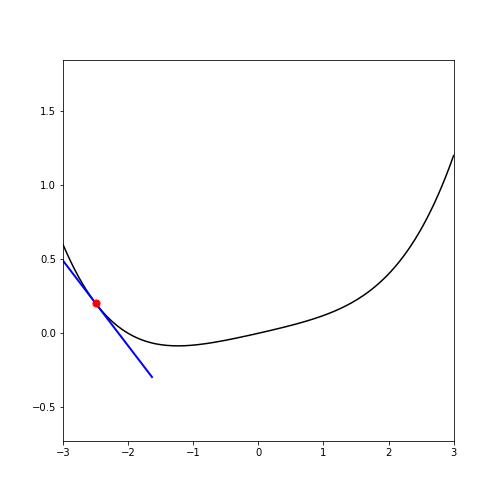
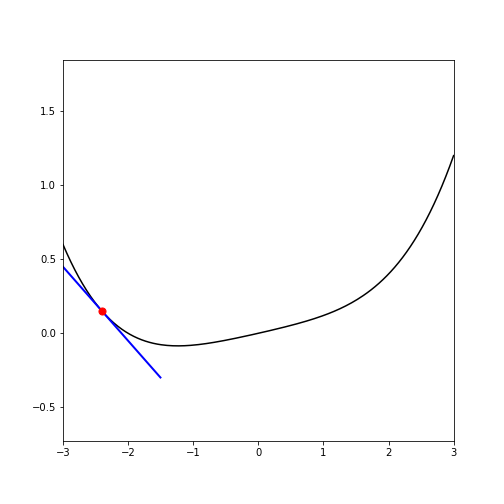
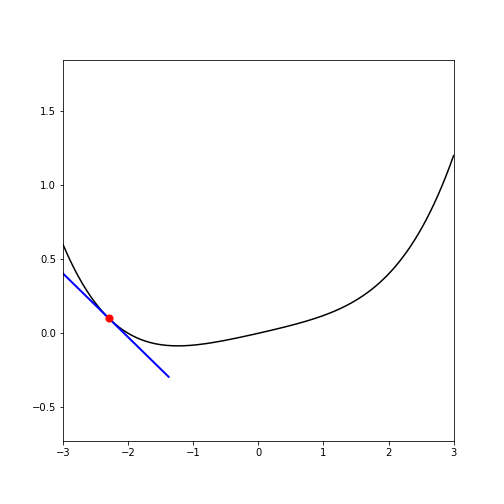
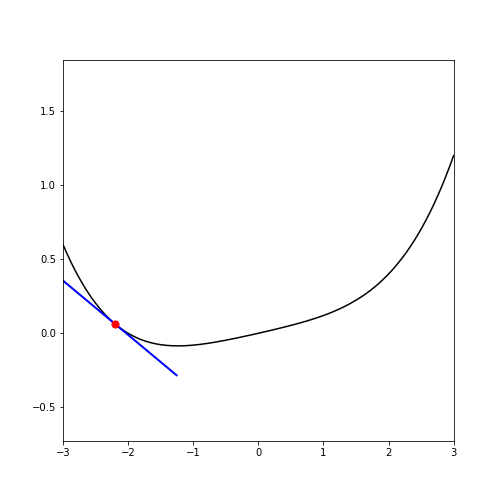
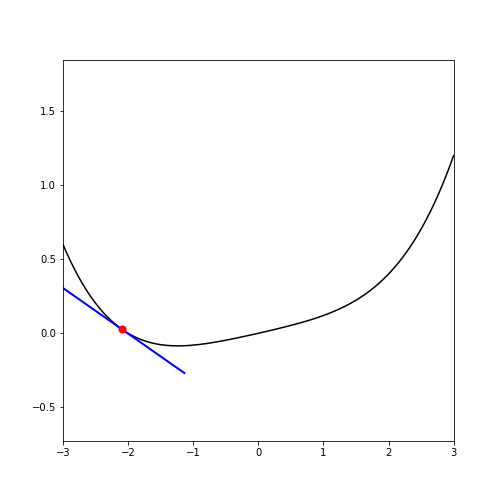
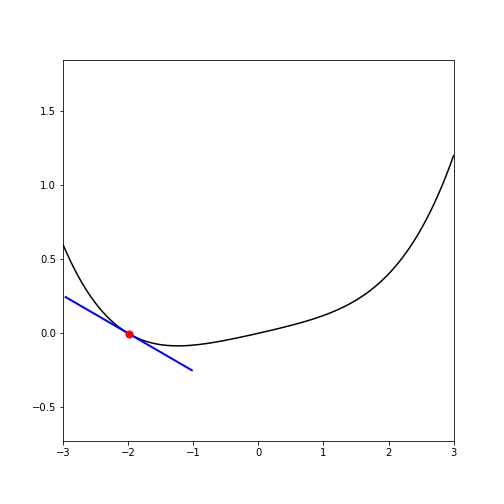
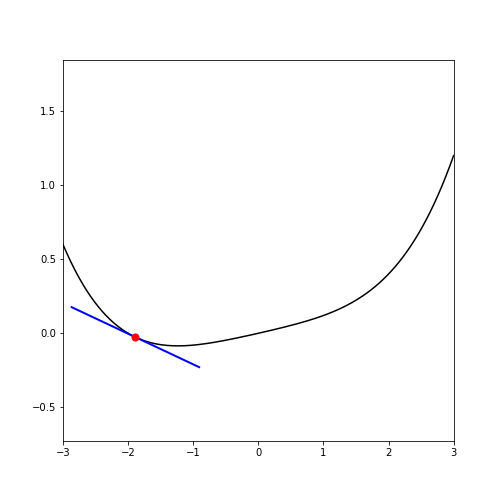
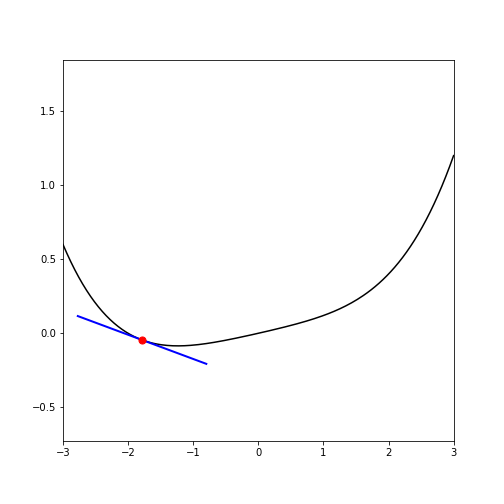
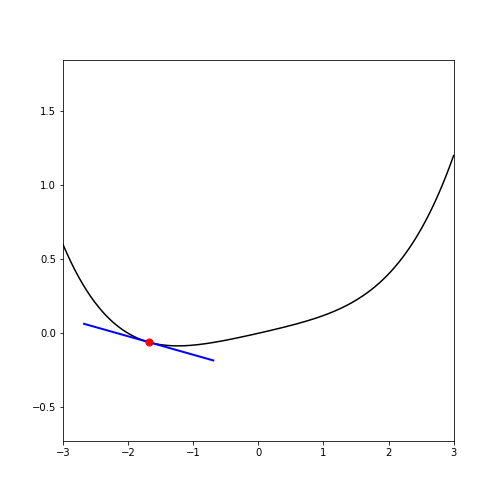
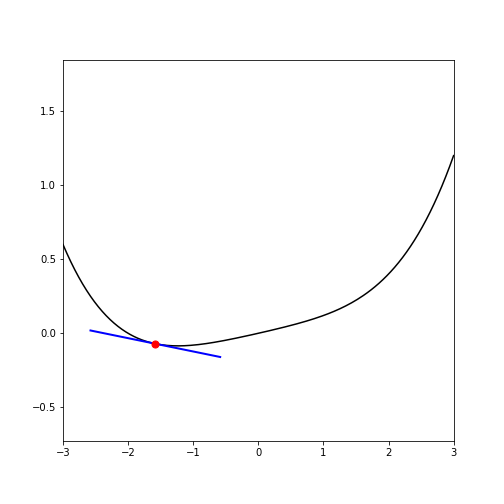
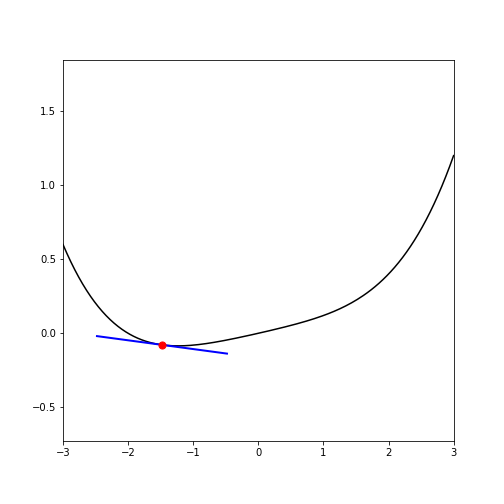
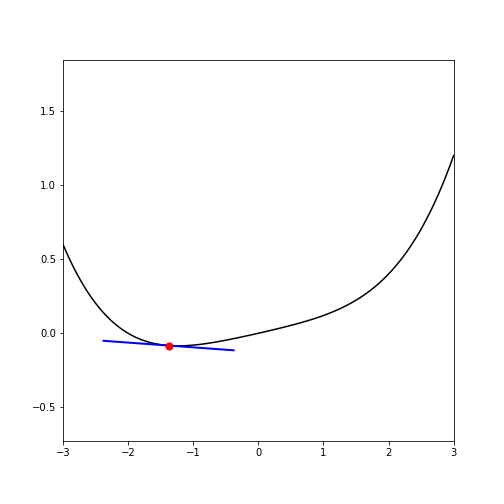
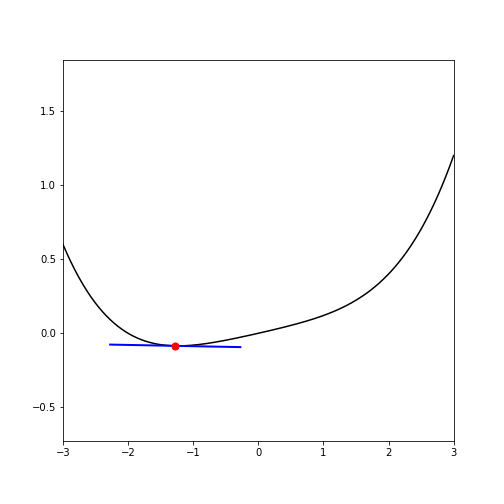
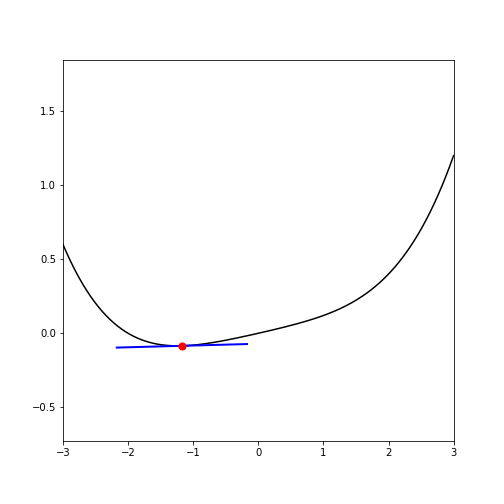
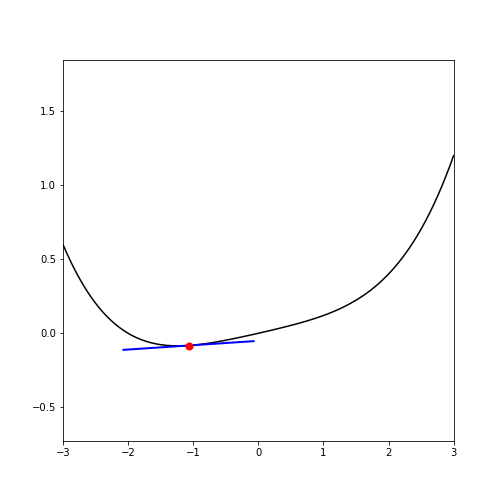
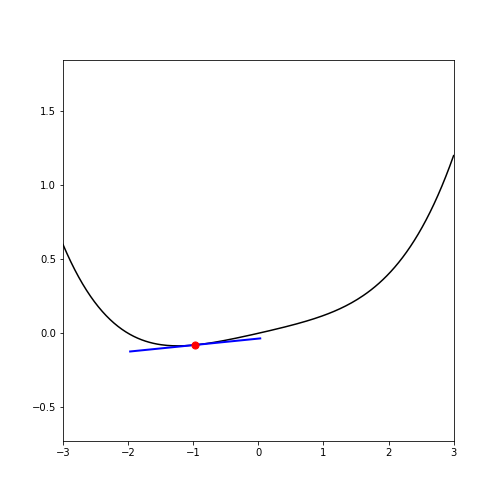
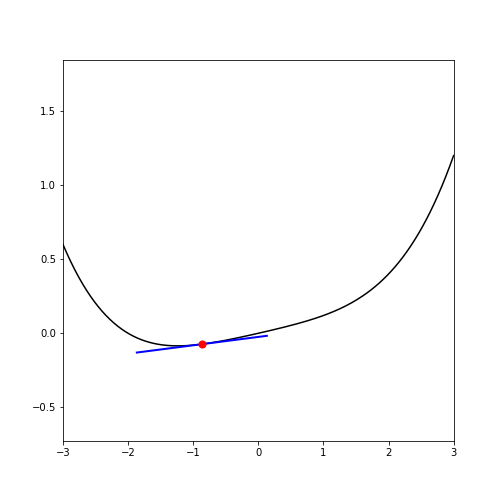
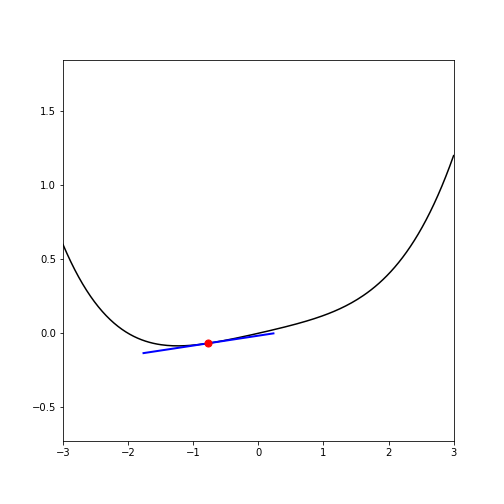
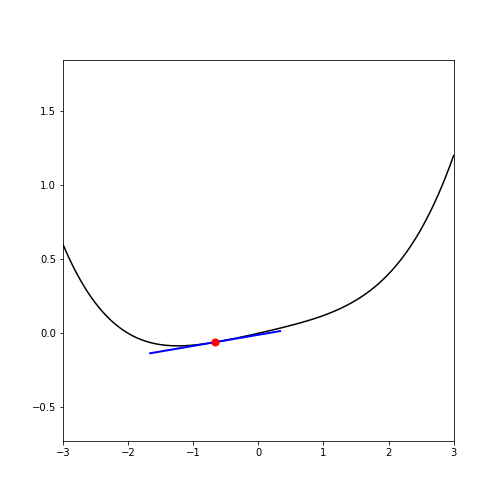
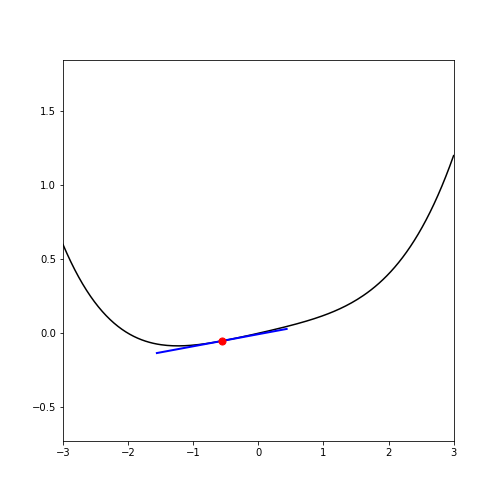
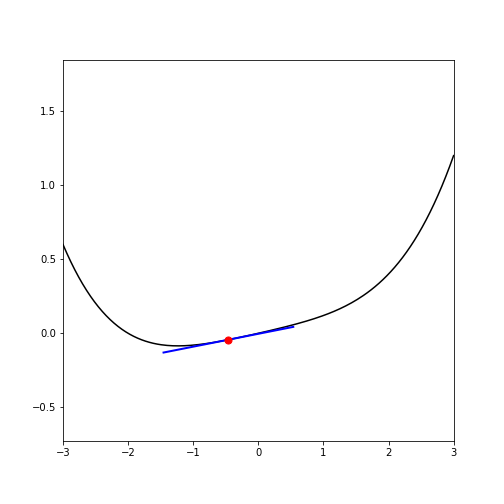
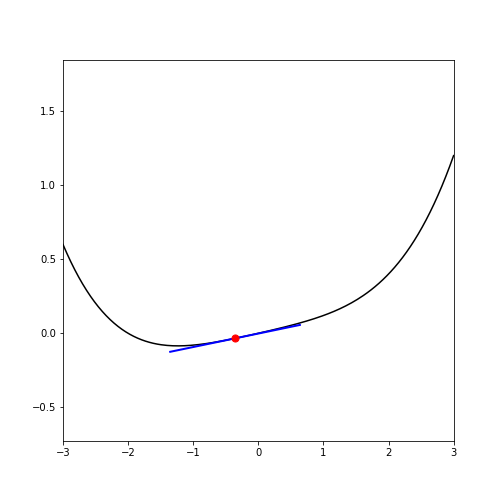
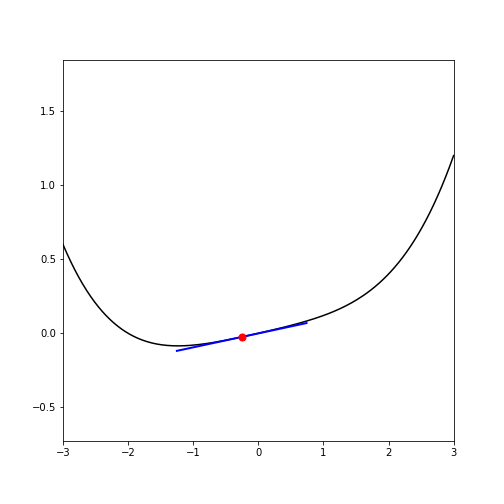
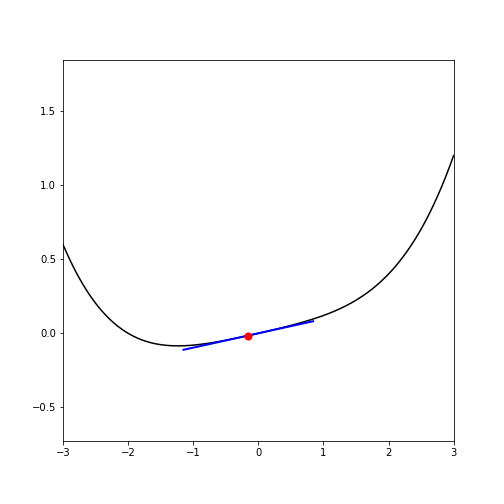
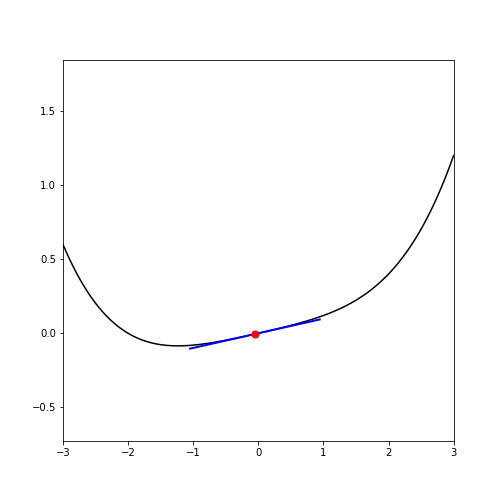
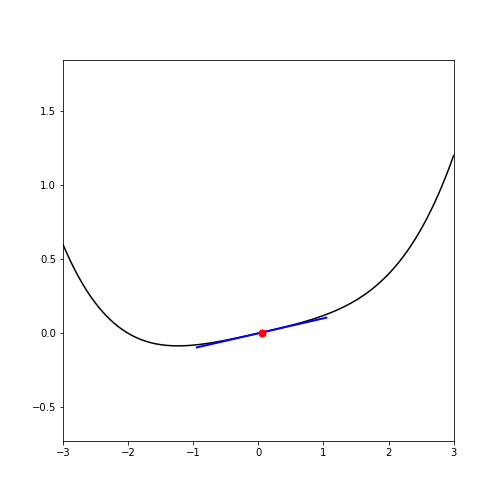
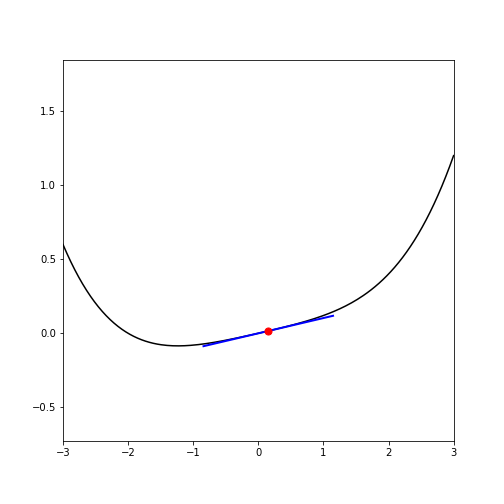
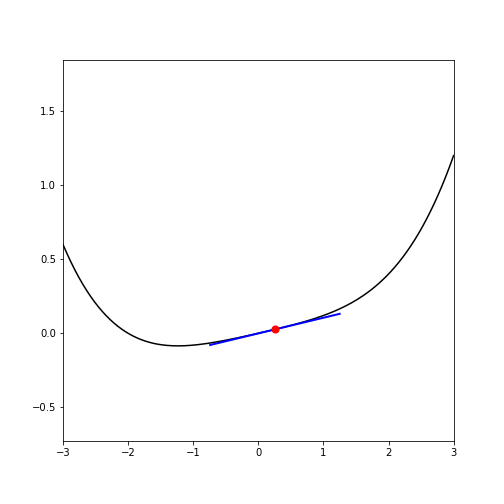
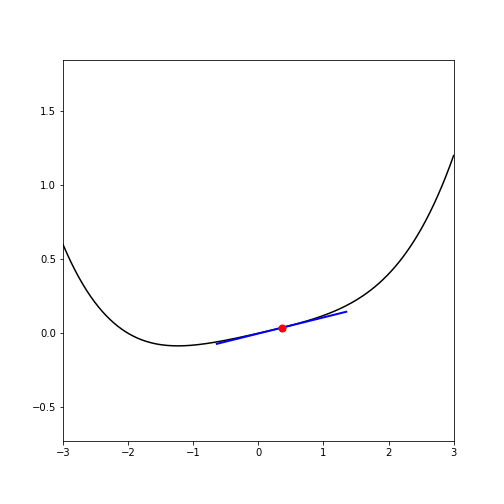
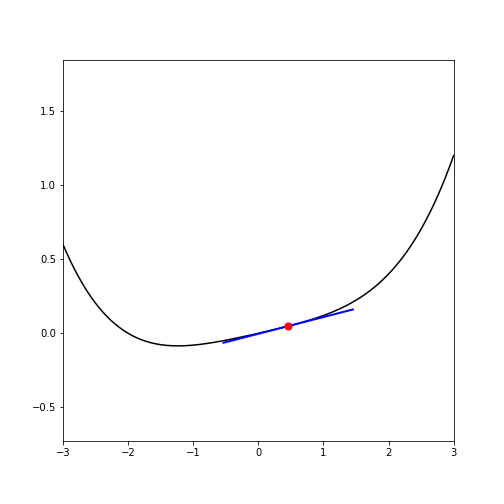
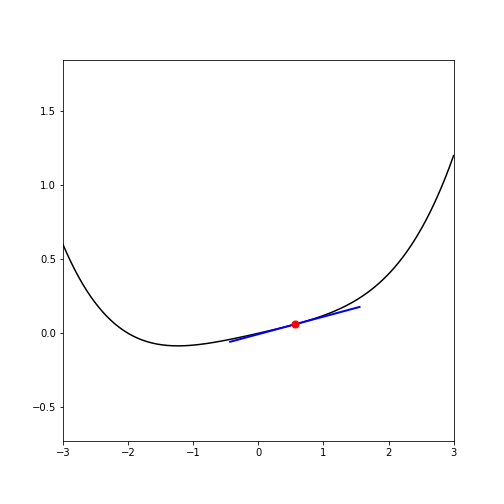
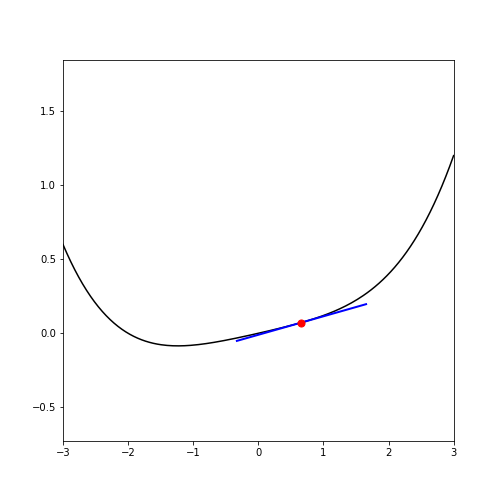
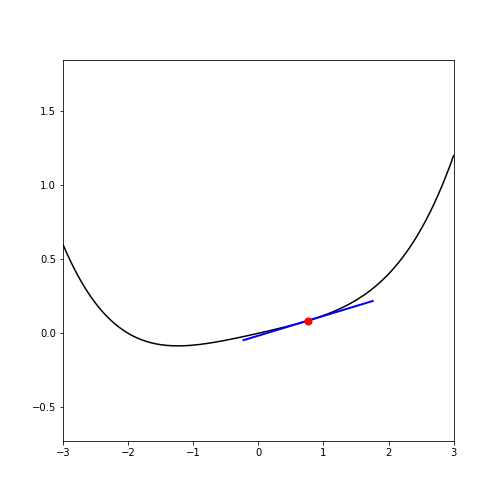
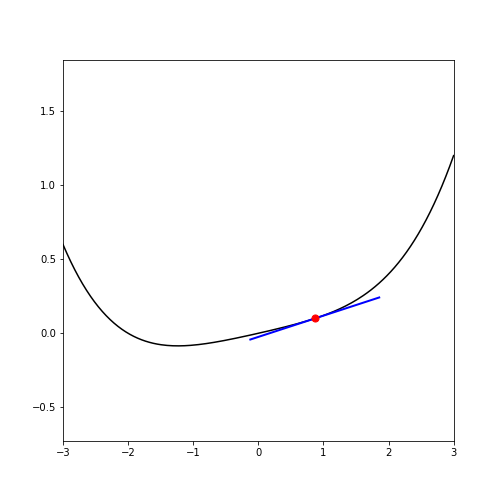
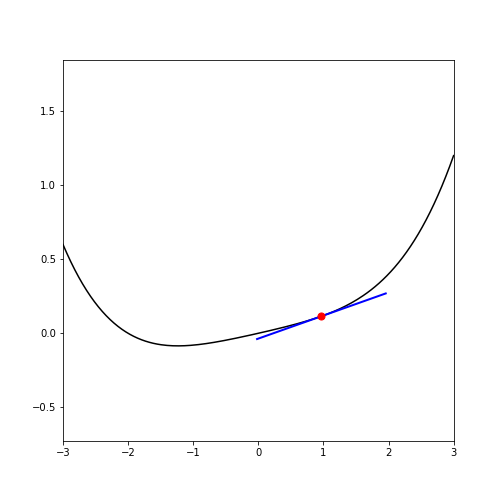
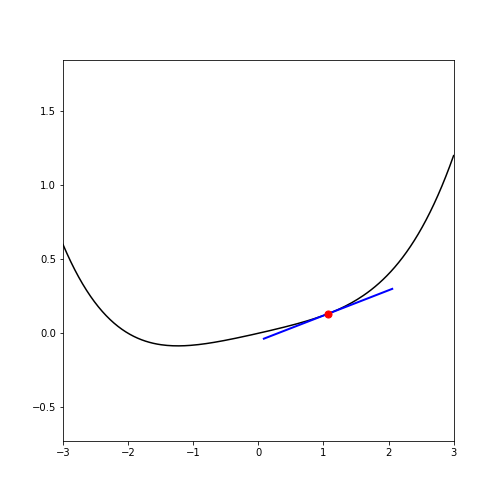
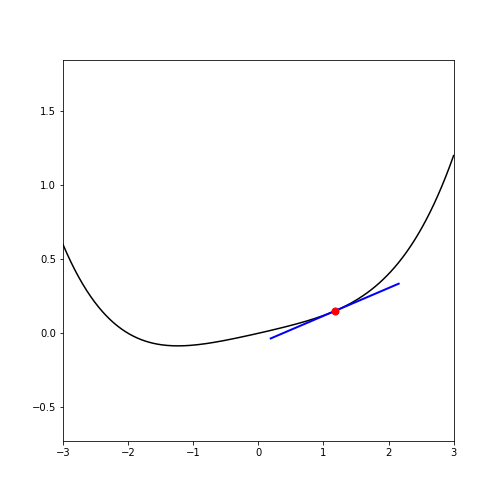
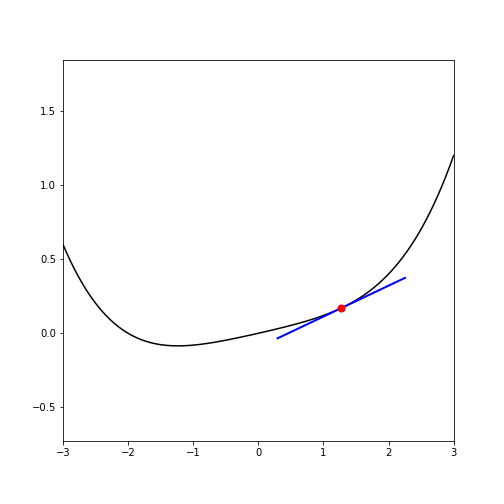
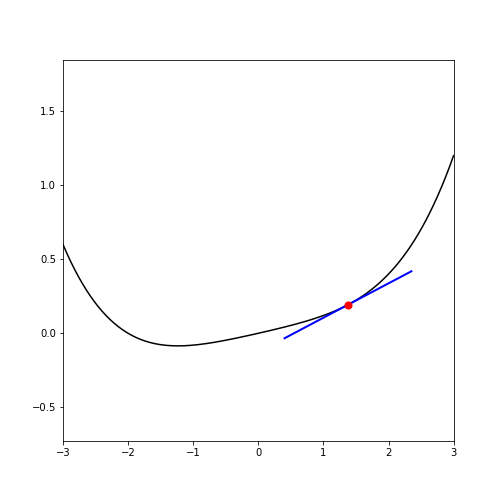
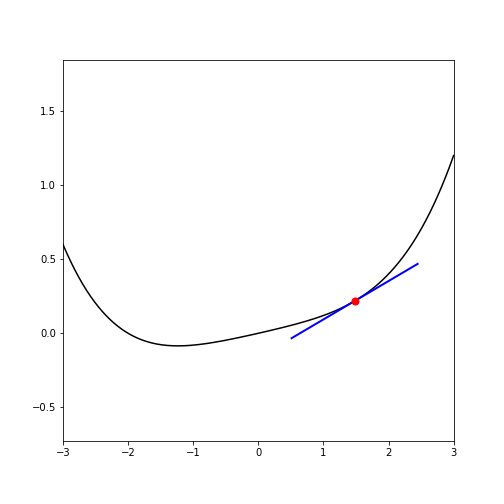
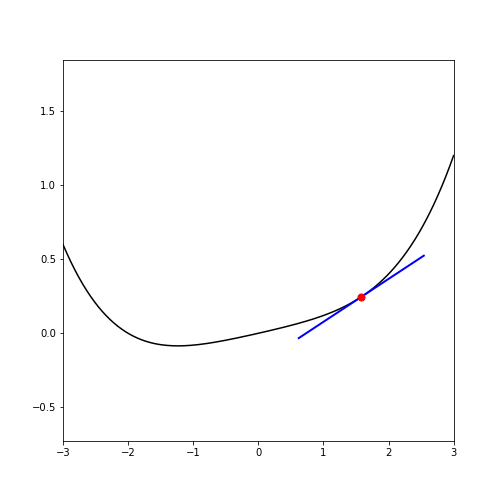
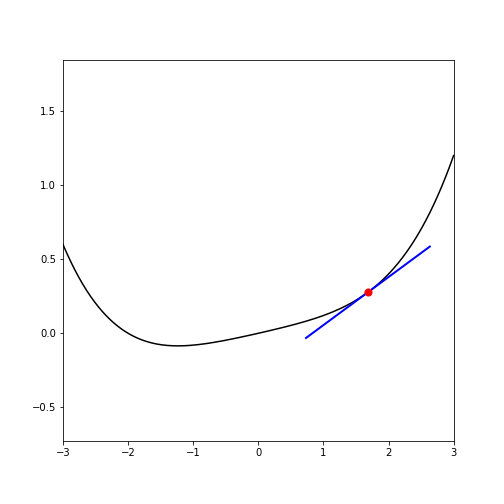
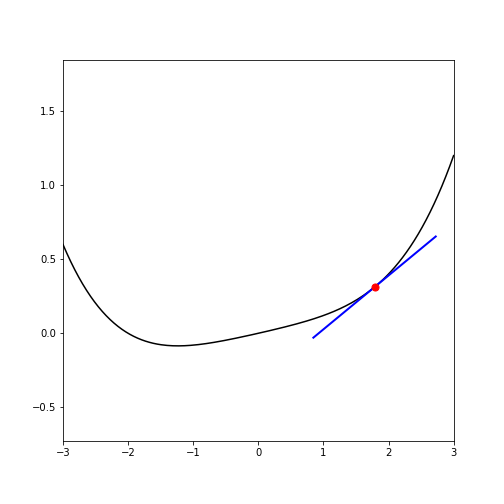
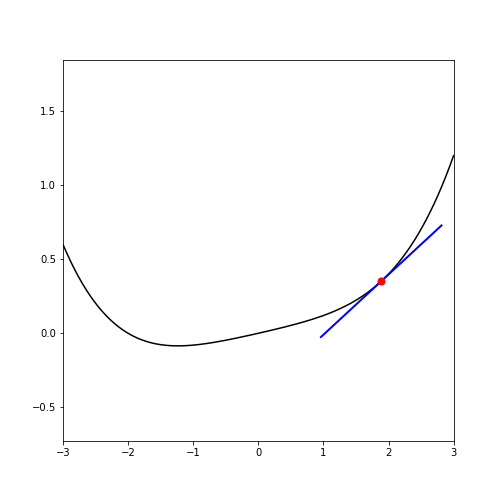
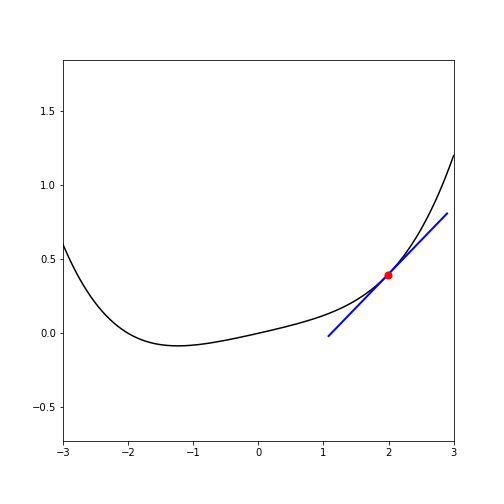
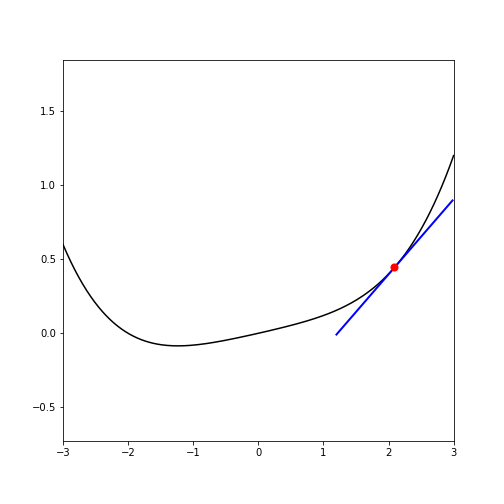
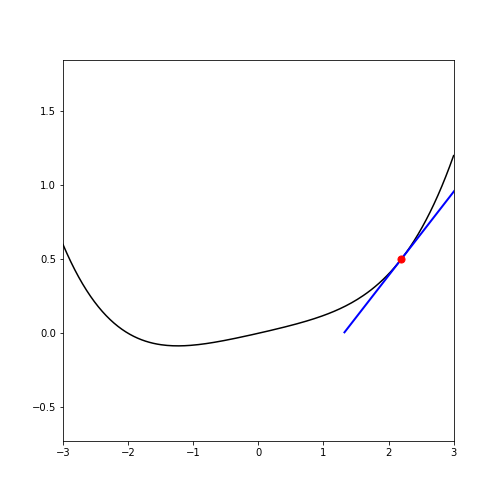
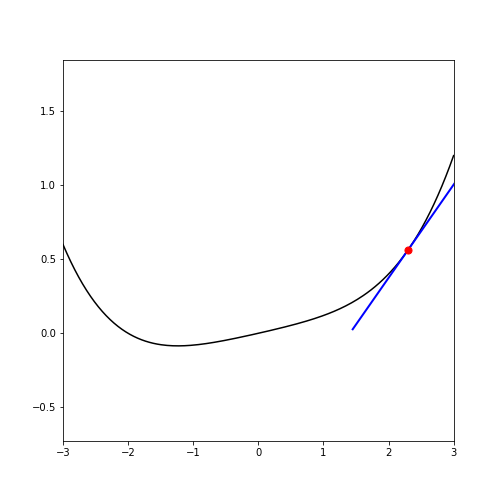
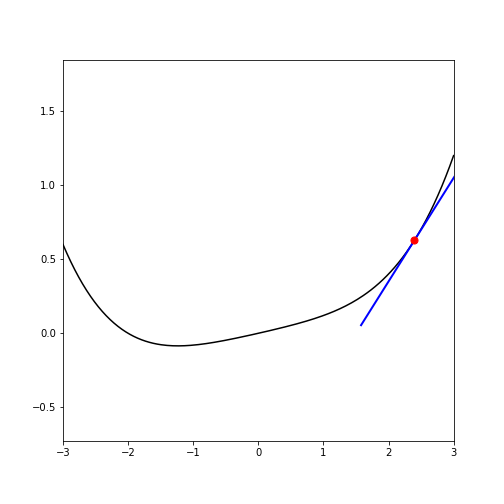
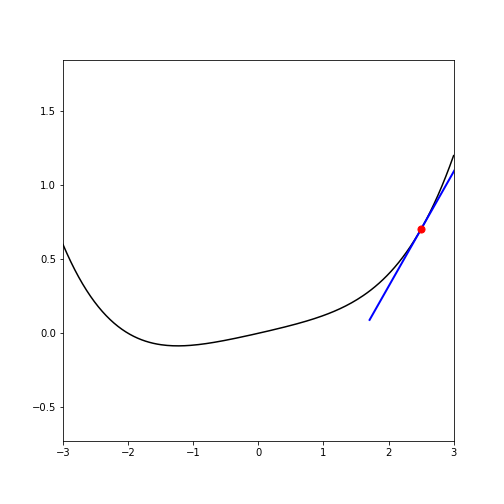

In [30]:
# make symbol for computing function
x = symbols('x')
# f = cos(5*x)*sin(x)
f = 1/float(20)*(x**4 + x**2 + 10*x)

# make your function numerical
f = lambdify((x),f,np)

# go
test = taylor_viz(f = f)
test.animate_first_order_approx()

In [4]:
grad = compute_grad(f)

In [5]:
grad(0)

/Users/Nurgetson/anaconda/lib/python3.5/site-packages/autograd/convenience_wrappers.py:213: UserWarning: Casting int to float to handle differentiation.
  warnings.warn("Casting int to float to handle differentiation.")


array(10.0)

In [18]:
f2 = cos(5*x)*sin(x)
f2 = lambdify((x),f2,np)


In [19]:
grad2 = compute_grad(f2)

In [24]:
grad2(0)

/Users/Nurgetson/anaconda/lib/python3.5/site-packages/autograd/convenience_wrappers.py:213: UserWarning: Casting int to float to handle differentiation.
  warnings.warn("Casting int to float to handle differentiation.")


array(1.0)


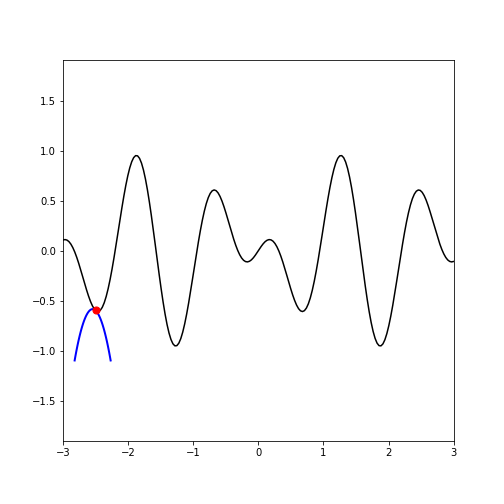
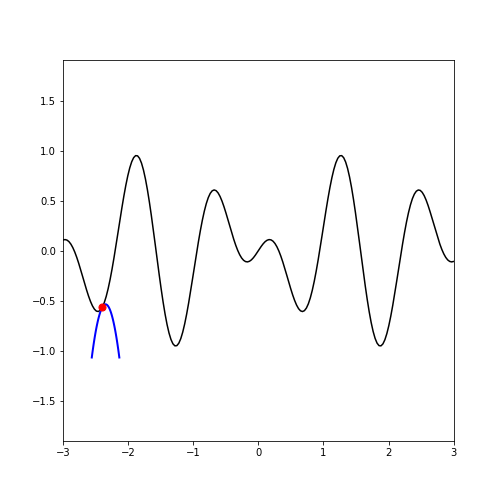
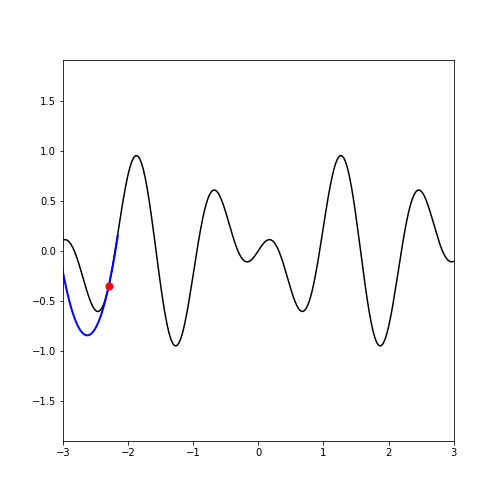
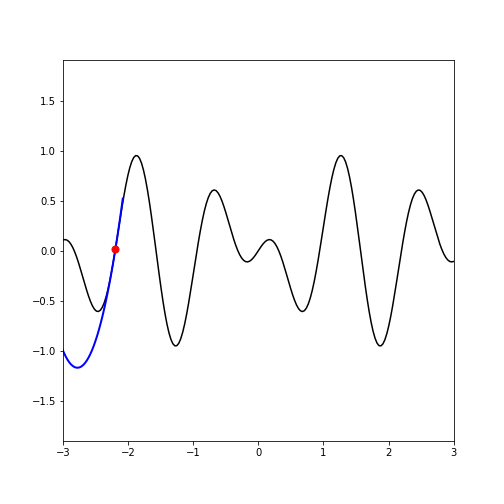
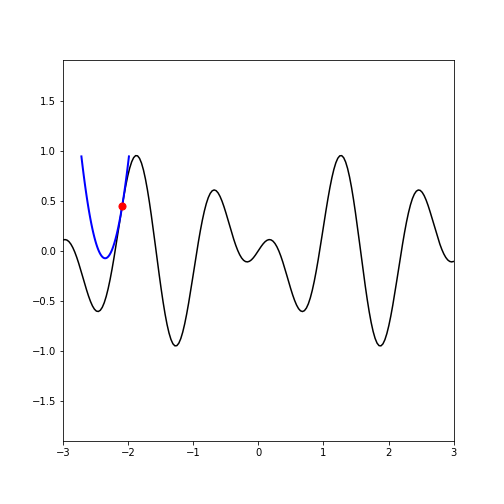
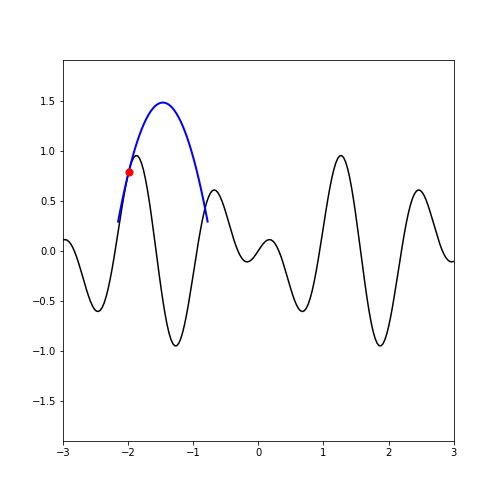
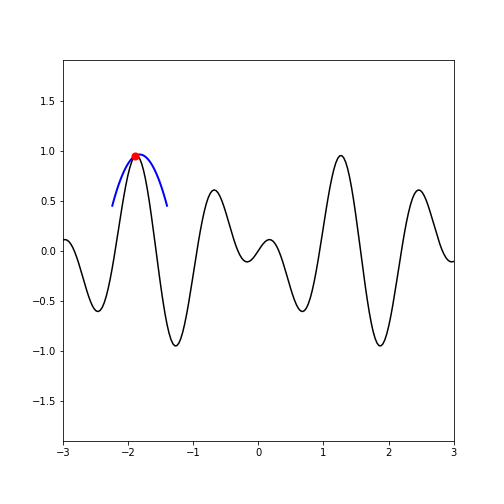
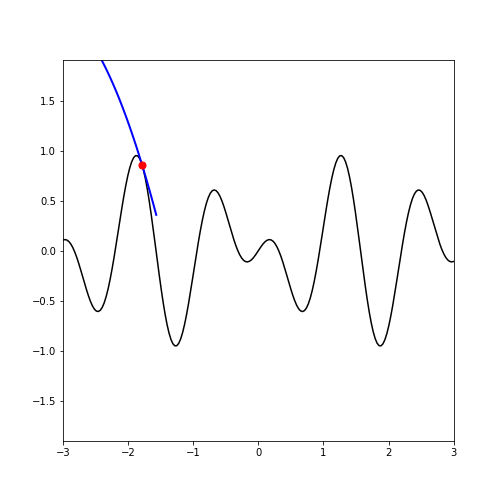
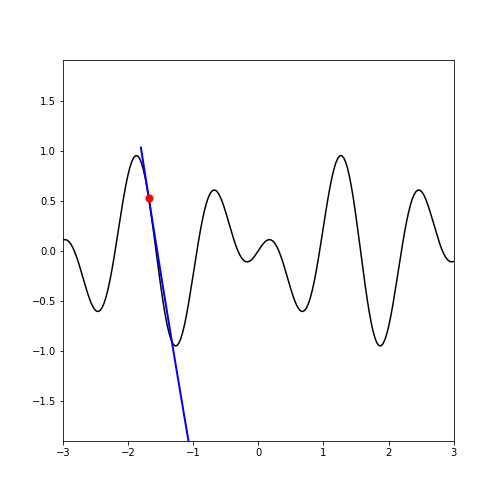
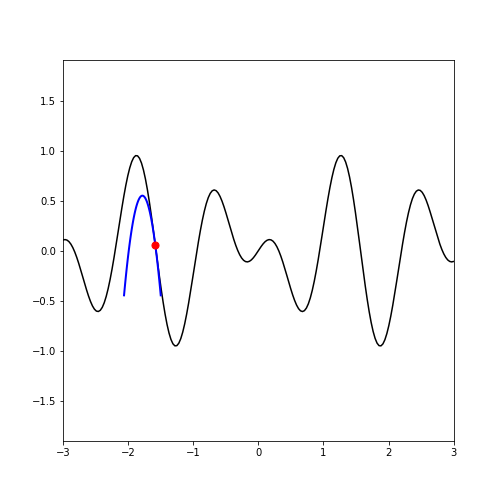
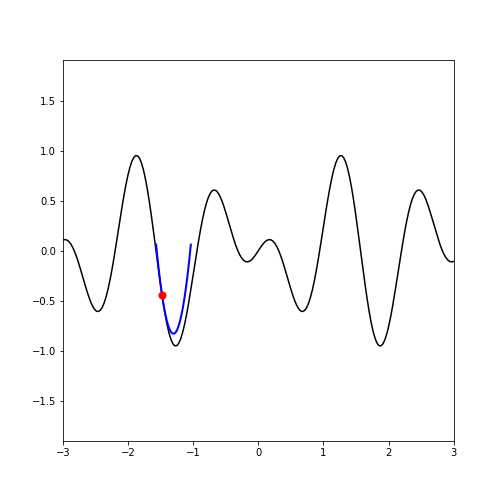
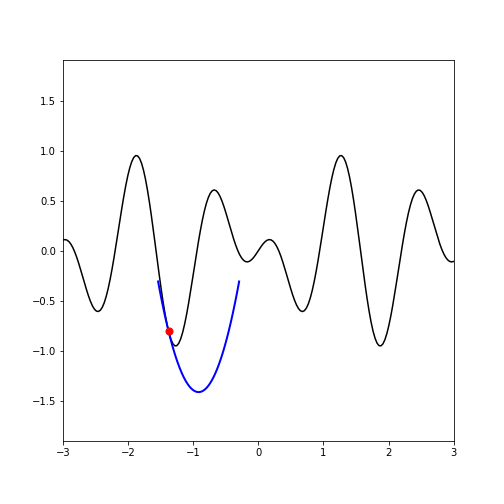
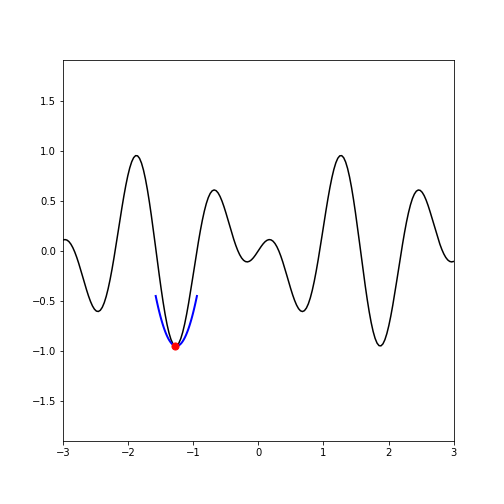
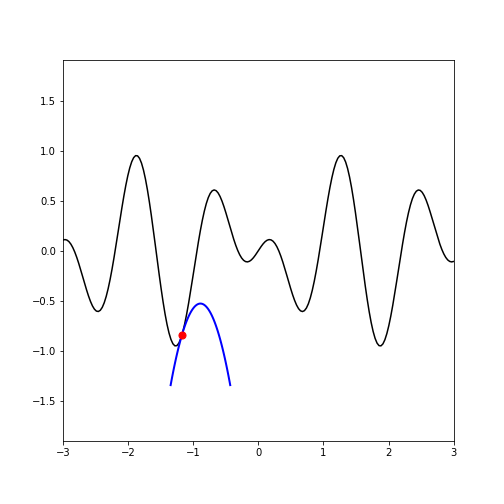
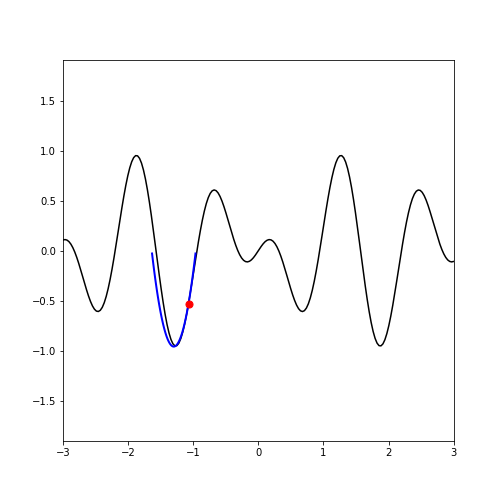
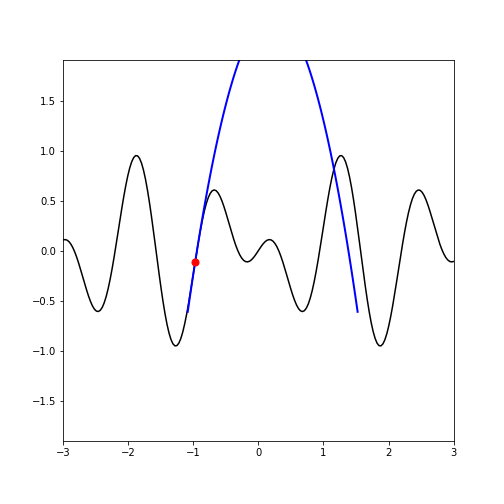
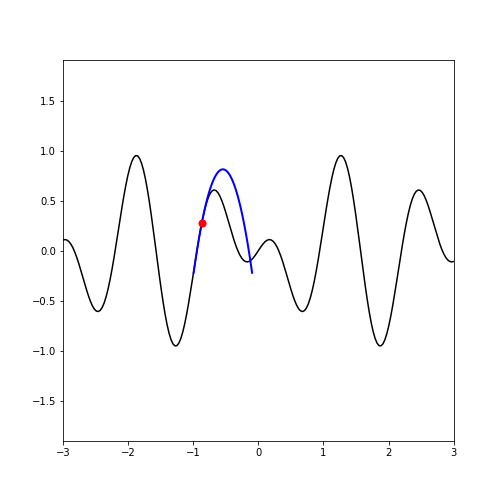
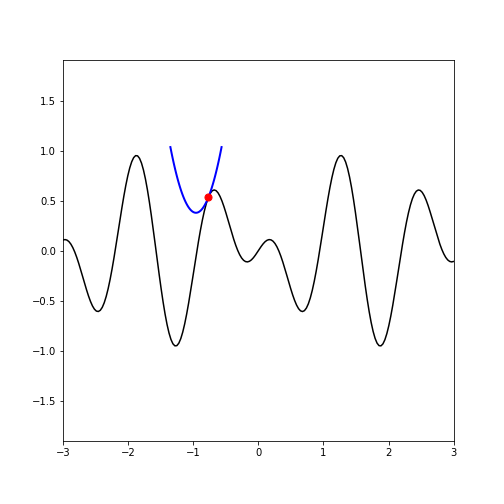
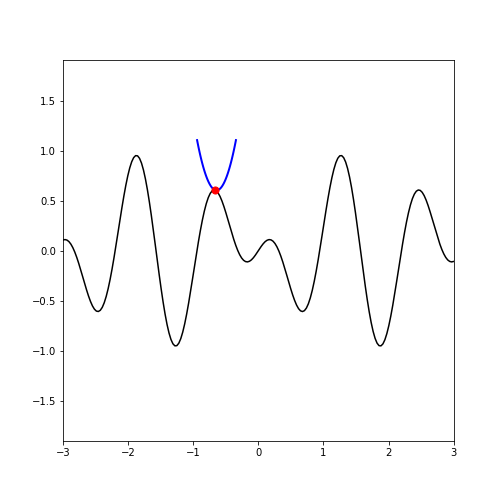
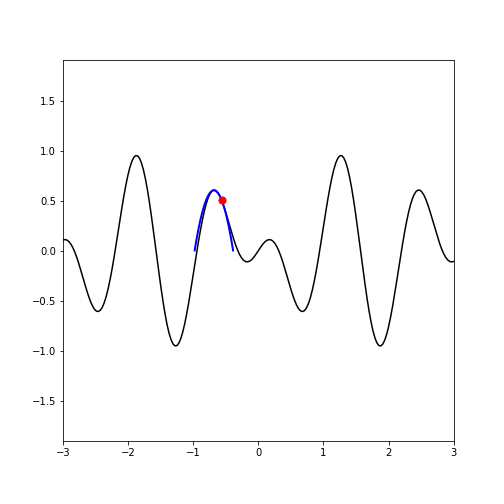
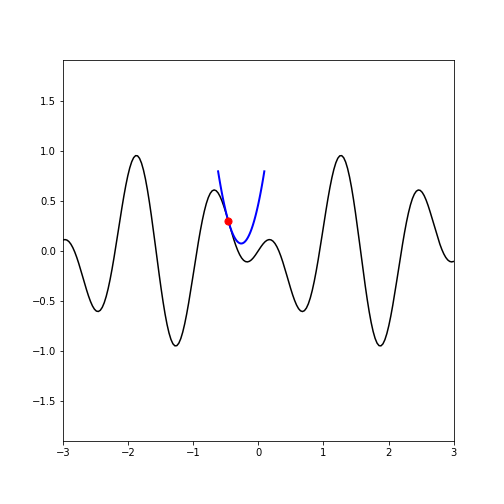
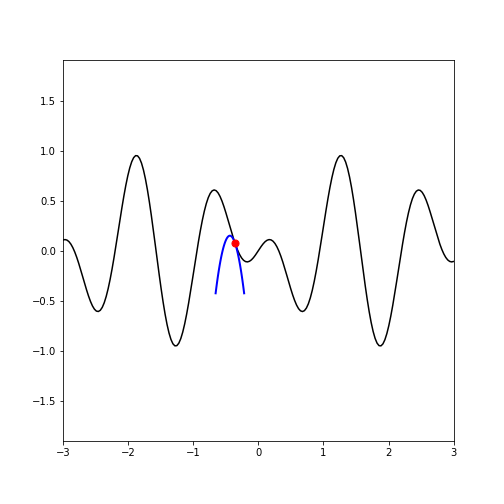
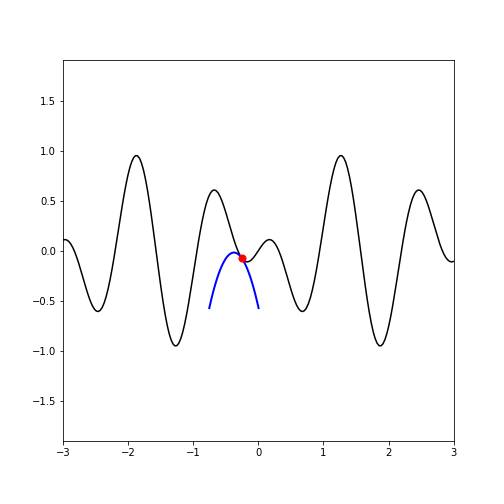
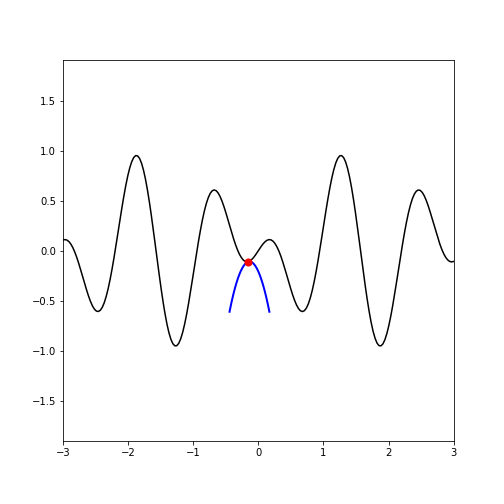
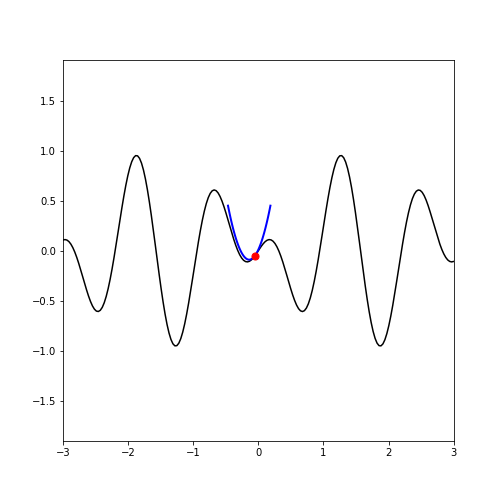
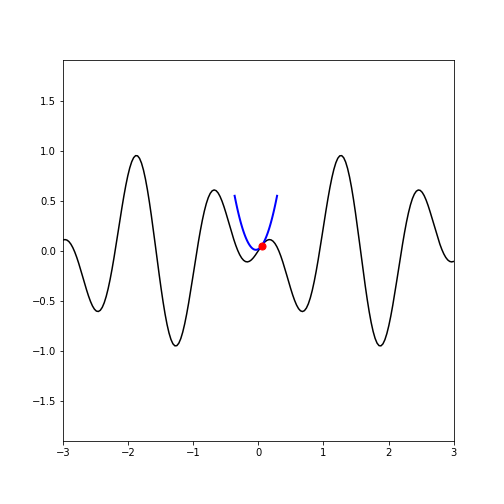
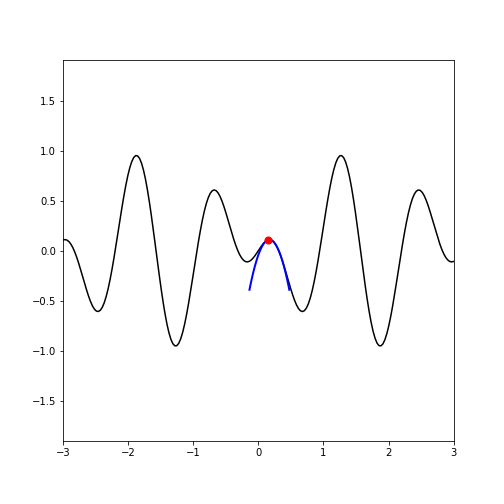
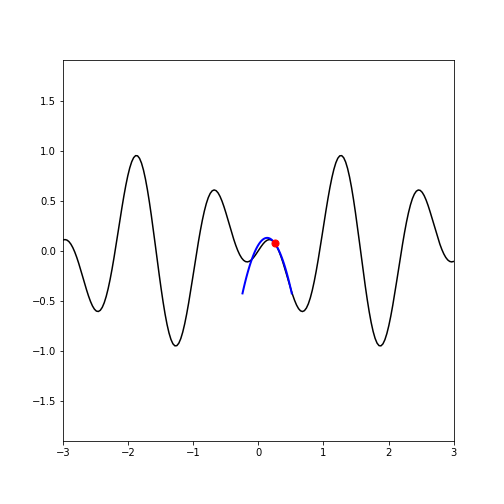
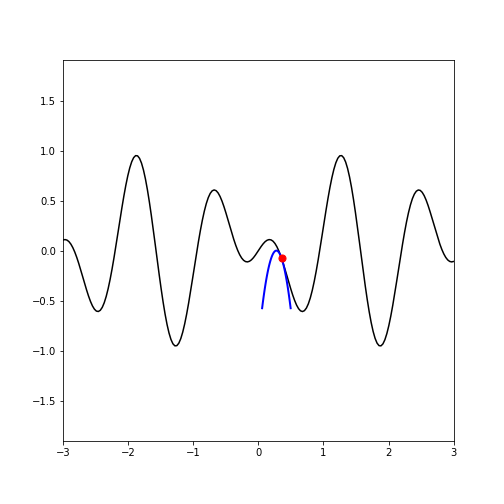
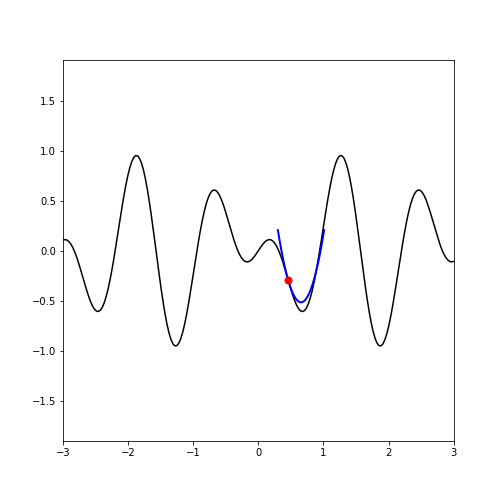
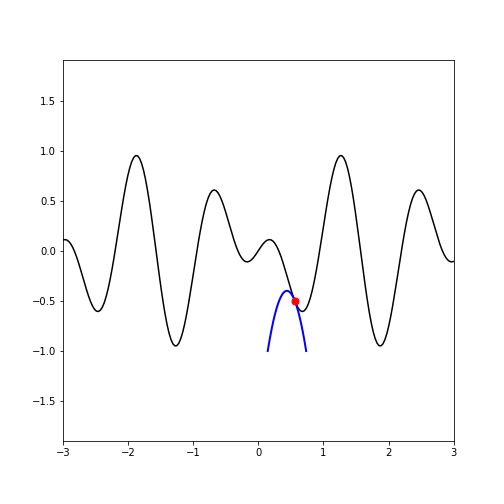
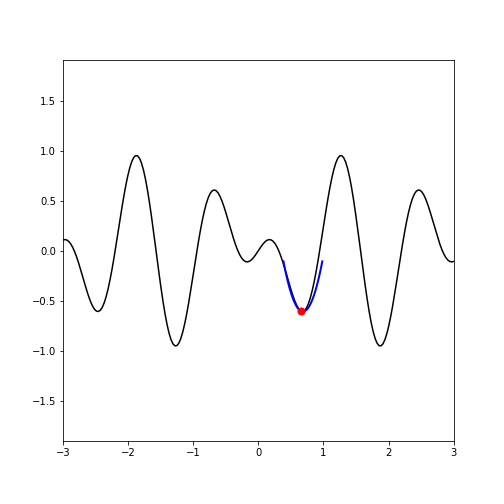
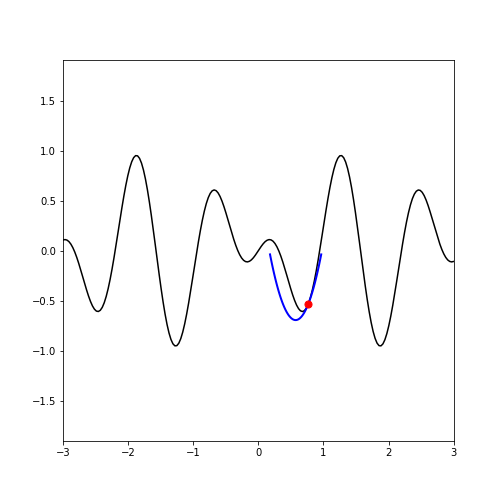
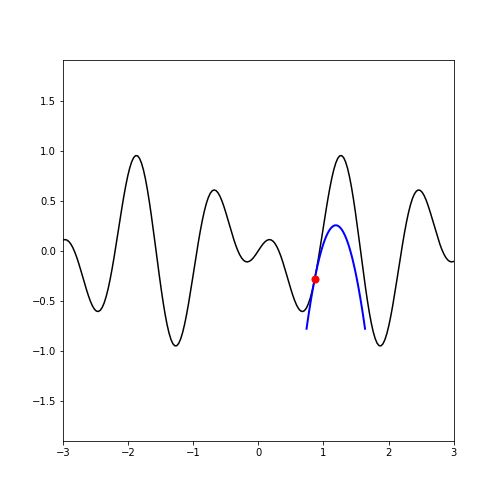
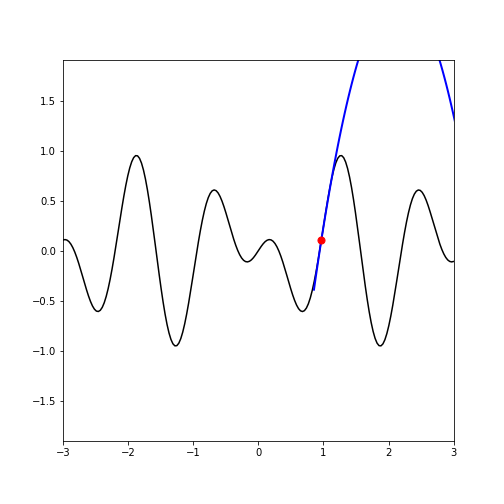
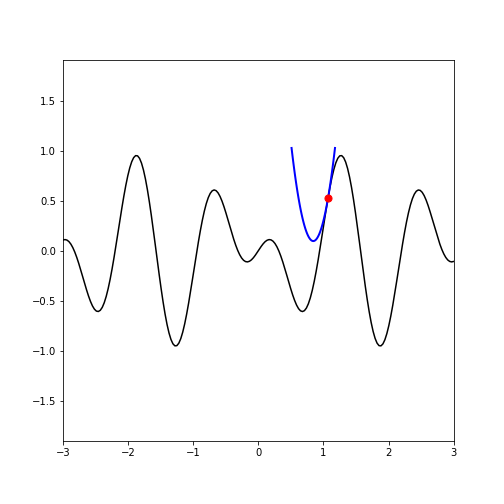
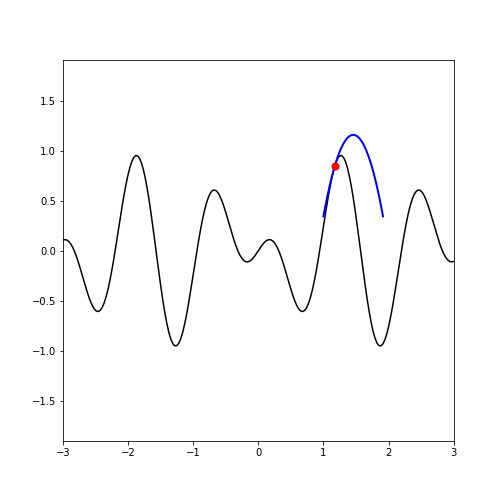
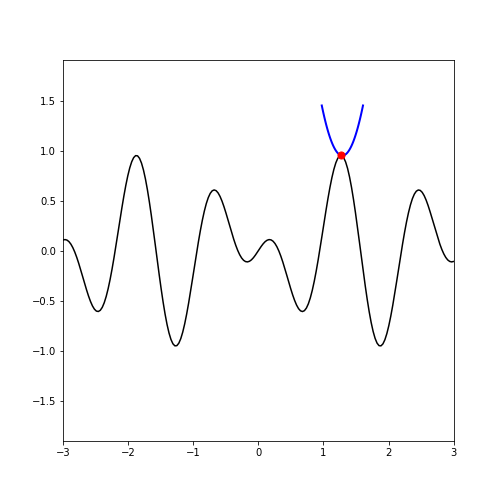
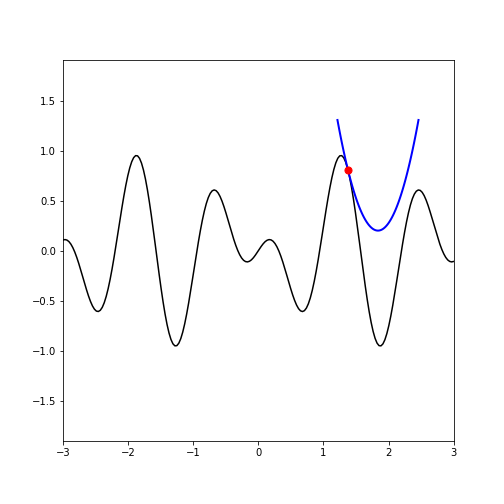
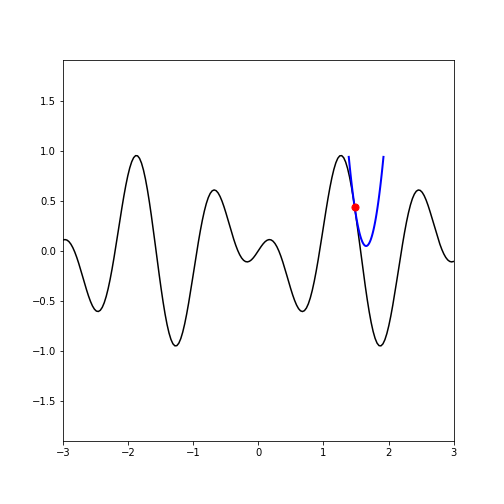
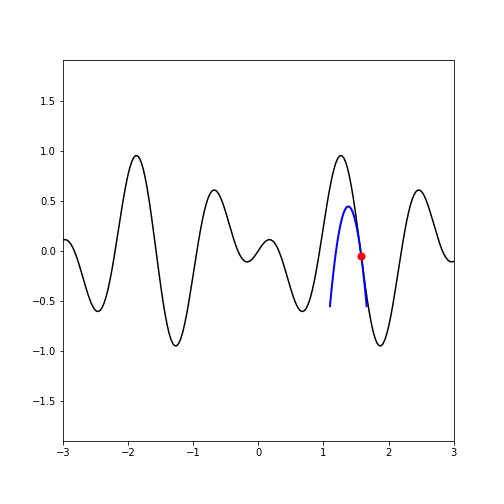
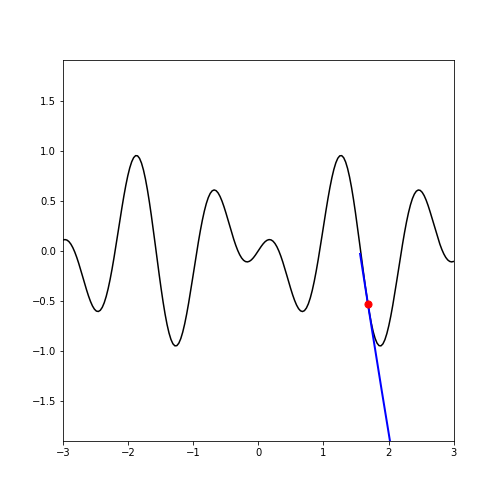
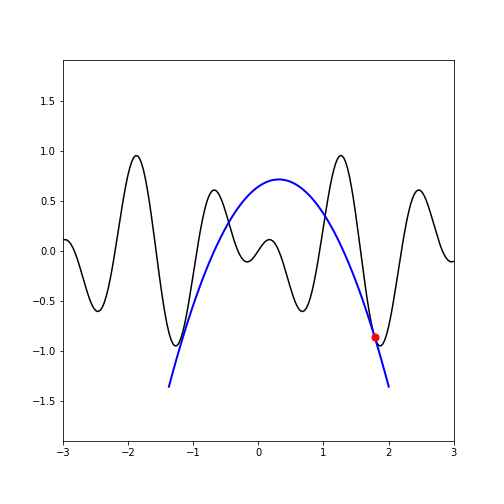
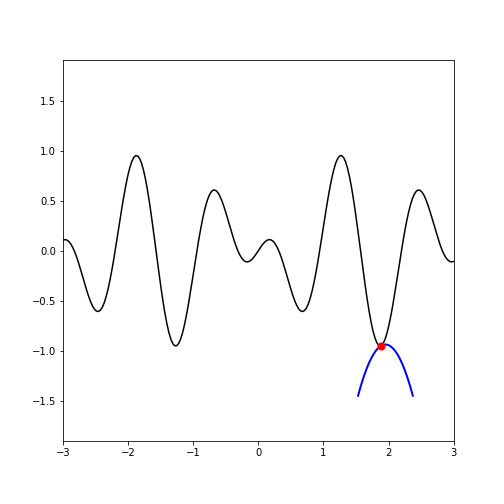
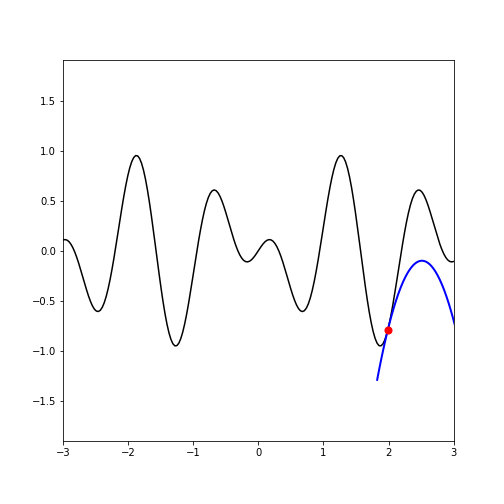
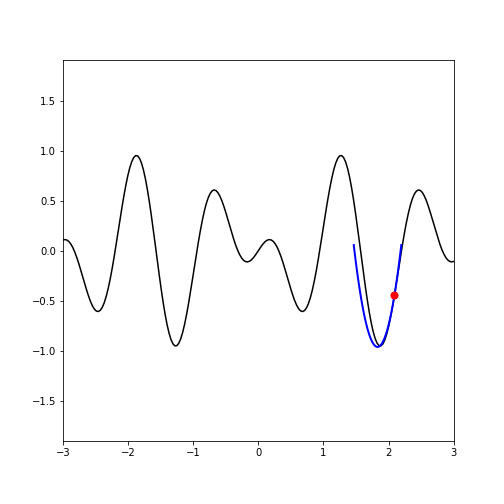
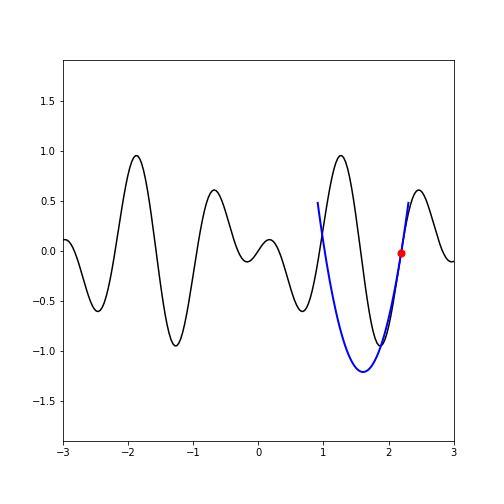
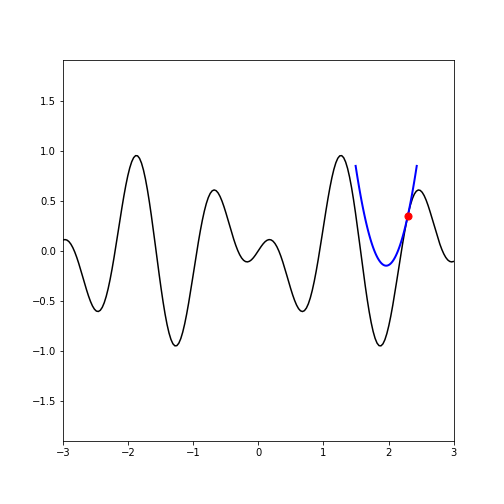
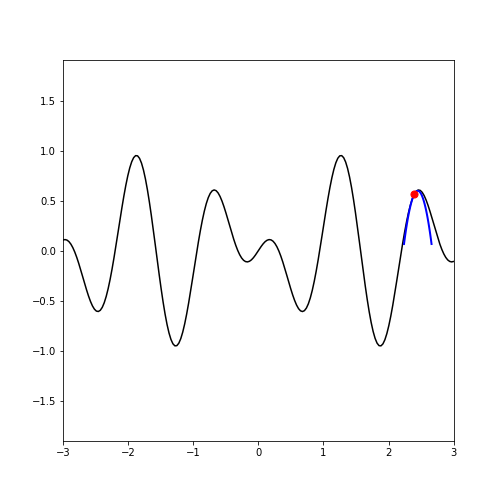
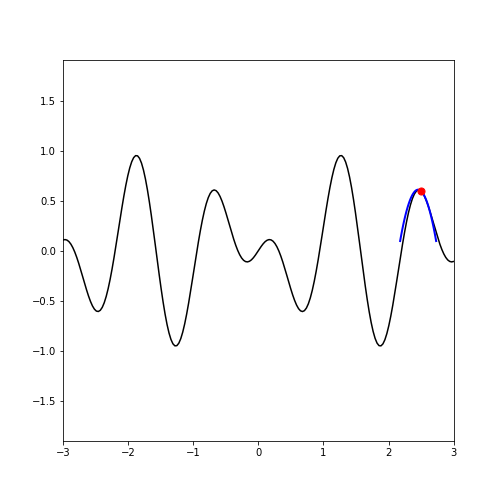

In [7]:
# make symbol for computing function
x = symbols('x')
f = cos(5*x)*sin(x)
# f = x**4 + x**2 + 10*x

# make your function numerical
f = lambdify((x),f,np)

# go
test = taylor_viz(f = f)
test.animate_second_order_approx()